In [1]:
%matplotlib inline

In [2]:
import numpy as np
class cpoly:

    def __init__(self, points=[[0,0], [0,1], [1,0]], assert_convexity=True):
        """
        Initialize 2D Polygon with a sequence of 2D points
        """
        self._points = np.array(points)
        assert self.p.shape[0] >= 3
        assert self.p.shape[1] == 2
        assert self.is_convex or not(assert_convexity)

    @property
    def n(self):
        return self.p.shape[0]

    @property
    def p(self):
        return self._points

    @property
    def is_convex(self):
        """
        Check convexity of the polygon (operational for a non intersecting polygon)
        """
        return self.contains()

    def contains(self, p=None, y=None, debug=False, atol=2e-16):
        """
        Check if a 2D convex polygon contains a point (also used to assess convexity)
        Returns:
           -1: Point is oustide the polygon
            0: Point is close to polygon edge (epsilon ball)
           +1: Point is inside the polygon
        """
        s = None
        c = False
        n = self.n
        for k in range(n):
            # Vector Differences:
            d1 = self.p[(k+1)%n,:] - self.p[k%n,:]
            if p:
                d2 = p - self.p[k%n,:]
            else:
                d2 = self.p[(k+2)%n,:] - self.p[(k+1)%n,:]
            # Cross Product:
            z = np.cross(d1, d2)
            if np.allclose(z, 0, atol=atol):
                s_ = 0
                c = True
            else:
                s_ = np.sign(z)
            # Debug Helper:
            if debug:
                print("k = %d, d1 = %s, d2 = %s, z = %.32f, s = %d" % (k, d1, d2, z, s_))
            # Check if cross product sign change (excluded null, when point is colinear with the segment)
            if s and (s_ != s) and not(s_ == 0):
                # Nota: Integer are exact if float representable, therefore comparizons are correct
                return -1
            s = s_
        if c:
            return 0
        else:
            return 1

    def plot(self, axe=None):
        import matplotlib.pyplot as plt
        from matplotlib.patches import Polygon
        if not(axe):
            fig, axe = plt.subplots()
            axe.plot(self.p[:,0], self.p[:,1], 'x', markersize=10, label='Points $p_i$')
            axe.add_patch(Polygon(self.p, alpha=0.4, label='Area'))
            axe.set_xlabel("$x$")
            axe.set_ylabel("$y$")
            axe.set_title("Polygon")
            axe.set_aspect('equal')
            axe.legend(bbox_to_anchor=(1,1), loc='upper left')
            axe.grid()
        return axe.get_figure(), axe

In [3]:
def isInsideTriangle(x,y):
    if  x == 0 or y == 0 or y ==  1-x:
        #print('on the border of the triangle')
        return 0
    elif x > 1 or y > 1 or x < 0 or y < 0 or y > 1-x:
        #print('outside of the triangle')
        #print(1-x)  # check the value
        return -1
    else:
        # verbose these values to double check
        #print(1-x)
        #print(y)
        #print(type(y))
        #print(type(1-x))
        #print(y==(1-x))
        #print('inside of the triangle')
        return 1

In [4]:
e = np.finfo(np.double).eps # 2.220446049250313e-16

In [5]:
p = cpoly()
tests = [
    ([0,0], 0), ([0,1], 0), ([1,0], 0), # Polygon vertices
    ([0,0.5], 0), ([-e,0.6], -1), ([e,0.4], 1), ([0.1, 0.1], 1), ([1,1], -1),
    ([0.5+e,0.5], -1), ([0.3-e,0.7], 1), ([0.7+e/2,0.3], -1),
    ([0, 1.2], -1), ([1.2, 0.], -1), # Those points make your logic fails
    ([0.2,0.8], 0), ([0.1,0.9], 0),
    ([0.8+10*e,0.2],-1), ([0.9+10*e,0.1],-1)
]

[0, 0] 0 0 True
[0, 1] 0 0 True
[1, 0] 0 0 True
[0, 0.5] 0 0 True
[-2.220446049250313e-16, 0.6] -1 -1 True
[2.220446049250313e-16, 0.4] 1 1 True
[0.1, 0.1] 1 1 True
[1, 1] -1 -1 True
[0.5000000000000002, 0.5] -1 -1 True
[0.29999999999999977, 0.7] 1 1 True
[0.7000000000000001, 0.3] 0 -1 False
[0, 1.2] -1 0 False
[1.2, 0.0] -1 0 False
[0.2, 0.8] 0 0 True
[0.1, 0.9] 0 0 True
[0.8000000000000023, 0.2] -1 -1 True
[0.9000000000000022, 0.1] -1 -1 True


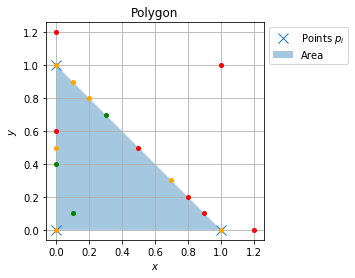

In [6]:
_, axe = p.plot()
cols = {-1: 'red', 0:'orange', 1:'green'}
for r in tests:
    x, q0 = r[0], r[1]
    q1 = p.contains(x)
    q2 = isInsideTriangle(*x)
    print(x, q1, q2, q1==q2)
    axe.plot(*x, 'o', markersize=4, color=cols[q1])

In [7]:
p.contains([0.7,0.3], debug=True)

k = 0, d1 = [0 1], d2 = [0.7 0.3], z = -0.69999999999999995559107901499374, s = -1
k = 1, d1 = [ 1 -1], d2 = [ 0.7 -0.7], z = 0.00000000000000000000000000000000, s = 0
k = 2, d1 = [-1  0], d2 = [-0.3  0.3], z = -0.29999999999999998889776975374843, s = -1


0

In [8]:
p.contains([0.2,0.8], debug=True)

k = 0, d1 = [0 1], d2 = [0.2 0.8], z = -0.20000000000000001110223024625157, s = -1
k = 1, d1 = [ 1 -1], d2 = [ 0.2 -0.2], z = 0.00000000000000005551115123125783, s = 0
k = 2, d1 = [-1  0], d2 = [-0.8  0.8], z = -0.80000000000000004440892098500626, s = -1


0

In [9]:
p.contains([0.2,0.8], debug=True)

k = 0, d1 = [0 1], d2 = [0.2 0.8], z = -0.20000000000000001110223024625157, s = -1
k = 1, d1 = [ 1 -1], d2 = [ 0.2 -0.2], z = 0.00000000000000005551115123125783, s = 0
k = 2, d1 = [-1  0], d2 = [-0.8  0.8], z = -0.80000000000000004440892098500626, s = -1


0

In [10]:
n = 40
lim = np.array([0.5,0.5]) + [-n*e/2, +n*e/2]
x = np.linspace(lim[0], lim[1], 30)
X, Y = np.meshgrid(x, x)
x, y = X.reshape(-1), Y.reshape(-1)

$$
\mathbf{a\times b} = \begin{vmatrix}
  \mathbf{i}&\mathbf{j}&\mathbf{k}\\
  a_x&a_y&0\\
  b_x&b_y&0\\
\end{vmatrix} = \mathbf{k}\cdot\left(a_xb_y - a_yb_x\right)
$$

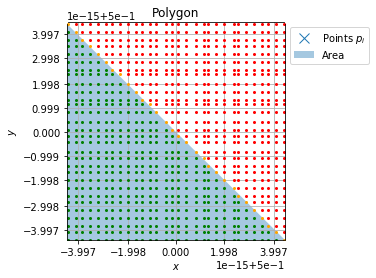

In [11]:
_, axe = p.plot()
axe.set_xlim(lim)
axe.set_ylim(lim)
for r in zip(x,y):
    q = p.contains(r)
    axe.plot(*r, 'o', color=cols[q], markersize=2)

In [12]:
def MahmoudElshahat(p):
    x, y = p
    if  x+y==1:
        return 0
    elif x < 0 or y < 0 or x+y>1:
        return -1
    else:
        return +1

In [13]:
def SamMason(p, epsilon=2e-16):
    x, y = p
    assert epsilon >= 0
    if (
        x >= -epsilon and x - 1 <= epsilon and
        y >= -epsilon and x - 1 + y <= epsilon
    ):
        return +1
    else:
        return -1

In [14]:
def MagedSaeed(p):
    x, y = p
    if  x == 0 or y == 0 or y ==  1-x:
        return 0
    elif x > 1 or y > 1 or x < 0 or y < 0 or y > 1-x:
        return -1
    else:
        return 1

In [15]:
import pandas as pd
data = []
for z in tests:
    x, q0 = z[0], z[1]
    rec = dict(exact=q0, x=x[0], y=x[1])
    for f in [p.contains, MagedSaeed, SamMason, MahmoudElshahat]:
        rec[f.__name__] = f(x)
    data.append(rec)
df = pd.DataFrame(data)

In [16]:
df = df.rename(columns={'contains': 'jlandercy'})
df

,MagedSaeed,MahmoudElshahat,SamMason,jlandercy,exact,x,y
0,0,1,1,0,0,0.000000e+00,0.0
1,0,0,1,0,0,0.000000e+00,1.0
2,0,0,1,0,0,1.000000e+00,0.0
3,0,1,1,0,0,0.000000e+00,0.5
4,-1,-1,-1,-1,-1,-2.220446e-16,0.6
5,1,1,1,1,1,2.220446e-16,0.4
6,1,1,1,1,1,1.000000e-01,0.1
7,-1,-1,-1,-1,-1,1.000000e+00,1.0
8,-1,-1,-1,-1,-1,5.000000e-01,0.5
9,1,1,1,1,1,3.000000e-01,0.7


In [17]:
def colormap(value):
    return 'color: %s; font-weight: 700;' % cols[value]

In [18]:
def badval(df):
    s = df.sub(df.exact, axis=0)
    s[s==0] = 'background-color: green'
    s[s==1] = 'background-color: orange'
    s[s==2] = 'background-color: red'
    s.exact = ''
    return s

In [19]:
df.style.format("{:.18f}", subset=['x', 'y']).\
    applymap(colormap, subset=['exact']).\
    apply(badval, subset=['MagedSaeed', 'MahmoudElshahat', 'SamMason', 'jlandercy', 'exact'], axis=None)

,MagedSaeed,MahmoudElshahat,SamMason,jlandercy,exact,x,y
0,0,1,1,0,0,0.000000000000000000,0.000000000000000000
1,0,0,1,0,0,0.000000000000000000,1.000000000000000000
2,0,0,1,0,0,1.000000000000000000,0.000000000000000000
3,0,1,1,0,0,0.000000000000000000,0.500000000000000000
4,-1,-1,-1,-1,-1,-0.000000000000000222,0.599999999999999978
5,1,1,1,1,1,0.000000000000000222,0.400000000000000022
6,1,1,1,1,1,0.100000000000000006,0.100000000000000006
7,-1,-1,-1,-1,-1,1.000000000000000000,1.000000000000000000
8,-1,-1,-1,-1,-1,0.500000000000000222,0.500000000000000000
9,1,1,1,1,1,0.299999999999999767,0.699999999999999956


In [20]:
def badval2(df):
    t = df.sub(df.exact, axis=0)
    s = t.copy()
    s.loc[:,:] = ''
    s[t!=0] = 'border: solid 2px red'
    return s

In [21]:
df.style.format("{:.18f}", subset=['x', 'y']).\
    applymap(colormap, subset=['exact']).\
    apply(badval2, subset=['MagedSaeed', 'MahmoudElshahat', 'SamMason', 'jlandercy', 'exact'], axis=None)

,MagedSaeed,MahmoudElshahat,SamMason,jlandercy,exact,x,y
0,0,1,1,0,0,0.000000000000000000,0.000000000000000000
1,0,0,1,0,0,0.000000000000000000,1.000000000000000000
2,0,0,1,0,0,1.000000000000000000,0.000000000000000000
3,0,1,1,0,0,0.000000000000000000,0.500000000000000000
4,-1,-1,-1,-1,-1,-0.000000000000000222,0.599999999999999978
5,1,1,1,1,1,0.000000000000000222,0.400000000000000022
6,1,1,1,1,1,0.100000000000000006,0.100000000000000006
7,-1,-1,-1,-1,-1,1.000000000000000000,1.000000000000000000
8,-1,-1,-1,-1,-1,0.500000000000000222,0.500000000000000000
9,1,1,1,1,1,0.299999999999999767,0.699999999999999956


In [22]:
df

,MagedSaeed,MahmoudElshahat,SamMason,jlandercy,exact,x,y
0,0,1,1,0,0,0.000000e+00,0.0
1,0,0,1,0,0,0.000000e+00,1.0
2,0,0,1,0,0,1.000000e+00,0.0
3,0,1,1,0,0,0.000000e+00,0.5
4,-1,-1,-1,-1,-1,-2.220446e-16,0.6
5,1,1,1,1,1,2.220446e-16,0.4
6,1,1,1,1,1,1.000000e-01,0.1
7,-1,-1,-1,-1,-1,1.000000e+00,1.0
8,-1,-1,-1,-1,-1,5.000000e-01,0.5
9,1,1,1,1,1,3.000000e-01,0.7
